In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


In [2]:
#!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

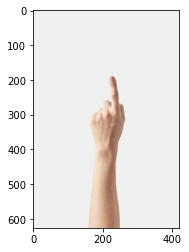

In [5]:
img = cv2.imread("images/image2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

# Get the data/landmarks for one hand

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
hand1_x,4.866916e-01,0.390804,0.312220,0.242791,0.165911,0.445037,0.435621,0.434990,0.437498,0.534905,...,0.563411,0.569457,0.610847,0.654297,0.677911,0.693819,0.673079,0.736444,0.773311,0.800366
hand1_y,8.419869e-01,0.743610,0.614620,0.516642,0.464176,0.451441,0.306366,0.218507,0.141086,0.452274,...,0.215790,0.141283,0.490782,0.365408,0.284704,0.214400,0.553710,0.469519,0.409507,0.350734
hand1_z,3.379067e-07,-0.054553,-0.086016,-0.115979,-0.146032,-0.038028,-0.070866,-0.101891,-0.128086,-0.042321,...,-0.095617,-0.117666,-0.055680,-0.085058,-0.111870,-0.132715,-0.075501,-0.101040,-0.118361,-0.132527


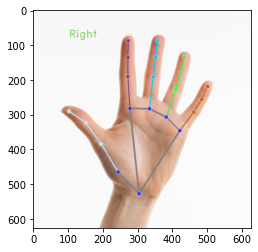

In [12]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("images/image1.jpeg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image);

# STEP 6: Extract the landmarks from the detection result.
hand1 = pd.DataFrame(detection_result.hand_landmarks[0], columns=['x', 'y', 'z']).T
hand1 = hand1.rename(index={'x': 'hand1_x', 'y': 'hand1_y', 'z': 'hand1_z'})
hand1.head()

# Getting the data/landmarks several images

/tmp/ipykernel_23715/1300141738.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hands_df = hands_df.append(hands_list)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
x1,5.062776e-01,0.584006,0.613663,0.606252,0.589848,0.570763,0.559756,0.549771,0.541283,0.504841,...,0.512355,0.525599,0.452164,0.461222,0.480281,0.487525,0.407043,0.425343,0.440746,0.445387
y1,6.194640e-01,0.572468,0.513003,0.465510,0.437789,0.480236,0.396337,0.349771,0.313510,0.482391,...,0.441161,0.465934,0.493996,0.453505,0.470540,0.490704,0.507445,0.473141,0.488793,0.506725
z1,-2.858335e-08,0.009327,0.009214,0.010876,0.012058,-0.039931,-0.053488,-0.058464,-0.062671,-0.045206,...,-0.027518,-0.020591,-0.046637,-0.039534,-0.015821,-0.006202,-0.047924,-0.043182,-0.026569,-0.017002
x2,4.866916e-01,0.390804,0.312220,0.242791,0.165911,0.445037,0.435621,0.434990,0.437498,0.534905,...,0.563411,0.569457,0.610847,0.654297,0.677911,0.693819,0.673079,0.736444,0.773311,0.800366
y2,8.419869e-01,0.743610,0.614620,0.516642,0.464176,0.451441,0.306366,0.218507,0.141086,0.452274,...,0.215790,0.141283,0.490782,0.365408,0.284704,0.214400,0.553710,0.469519,0.409507,0.350734
z2,3.379067e-07,-0.054553,-0.086016,-0.115979,-0.146032,-0.038028,-0.070866,-0.101891,-0.128086,-0.042321,...,-0.095617,-0.117666,-0.055680,-0.085058,-0.111870,-0.132715,-0.075501,-0.101040,-0.118361,-0.132527
x3,5.343726e-02,0.103648,0.199817,0.301901,0.387724,0.366867,0.471472,0.502047,0.519268,0.357522,...,0.396893,0.307658,0.323780,0.358677,0.254489,0.170045,0.268356,0.256087,0.171491,0.104730
y3,5.227783e-01,0.369935,0.261220,0.207261,0.145473,0.436852,0.457320,0.529589,0.610512,0.574930,...,0.699061,0.683728,0.680821,0.787242,0.760166,0.688928,0.756134,0.812324,0.747831,0.655704
z3,3.019569e-07,-0.097874,-0.156844,-0.205406,-0.253192,-0.105924,-0.174952,-0.221496,-0.250975,-0.094006,...,-0.223783,-0.231618,-0.090072,-0.191453,-0.216158,-0.207872,-0.092363,-0.183641,-0.208318,-0.207026


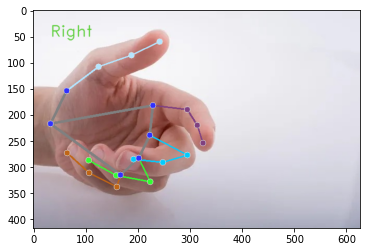

In [11]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd
import os
from os import listdir

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

i=1
hands_df = pd.DataFrame()
hands_list = []
# STEP 3: Loop to load the input images.
folder = "images" # path to folder containing images
for image in os.listdir(folder):
    image = mp.Image.create_from_file(f"{folder}/{image}")

    # STEP 4: Detect hand landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the classification result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    plt.imshow(annotated_image);

    # STEP 6: Extract the landmarks from the detection result.
    hand_df = pd.DataFrame(detection_result.hand_landmarks[0], columns=['x', 'y', 'z']).T

    #.format in rename not working
    cont = str(i)
    hand_df = hand_df.rename(index={'x': 'x'+cont, 'y':'y'+cont, 'z': 'z'+cont})
    hands_list.append(hand_df)
    
    i+=1

hands_df = hands_df.append(hands_list)

hands_df.head(20)

[                  0         1         2         3         4         5   \
 hand_x  5.062776e-01  0.584006  0.613663  0.606252  0.589848  0.570763   
 hand_y  6.194640e-01  0.572468  0.513003  0.465510  0.437789  0.480236   
 hand_z -2.858335e-08  0.009327  0.009214  0.010876  0.012058 -0.039931   
 
               6         7         8         9   ...        11        12  \
 hand_x  0.559756  0.549771  0.541283  0.504841  ...  0.512355  0.525599   
 hand_y  0.396337  0.349771  0.313510  0.482391  ...  0.441161  0.465934   
 hand_z -0.053488 -0.058464 -0.062671 -0.045206  ... -0.027518 -0.020591   
 
               13        14        15        16        17        18        19  \
 hand_x  0.452164  0.461222  0.480281  0.487525  0.407043  0.425343  0.440746   
 hand_y  0.493996  0.453505  0.470540  0.490704  0.507445  0.473141  0.488793   
 hand_z -0.046637 -0.039534 -0.015821 -0.006202 -0.047924 -0.043182 -0.026569   
 
               20  
 hand_x  0.445387  
 hand_y  0.506725  
 hand_